In [100]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [101]:
cond_good=50
cond_bad=500
quantity=50
n=10

In [102]:
Z=np.zeros((n,n))
def QR_decomposition(C,B):
    R=np.zeros((n,n))
    B[0:,0]=C[0:,0]
    B[0:,0]=B[0:,0]/np.linalg.norm(B[0:,0])
    for i in range(1,n):
        B[0:,i]=C[0:,i]
        for j in range(i):
            B[0:,i]-=np.dot(np.dot(C[0:,i],B[0:,j])/np.dot(B[0:,j],B[0:,j]),B[0:,j])
        B[0:,i]=B[0:,i]/np.linalg.norm(B[0:,i])
    for i in range(n):
        for j in range(i,n):
            R[i,j]+=np.dot(B[0:,i],C[0:,j])
    composite_matrix=np.hstack([R,E])
    j=n-1
    while j>=0:
        composite_matrix[j,j:]=composite_matrix[j,j:]/composite_matrix[j,j]
        i=j-1
        while i>=0:
            composite_matrix[i,j:]=composite_matrix[i,j:]-composite_matrix[j,j:]*composite_matrix[i,j]
            i-=1
        j-=1
    inv_R=composite_matrix[0:,n:]
    return [inv_R,B]

In [103]:
result_x=np.random.sample(n).reshape(-1, 1)
lambda1=1
lambda2=cond_good
lambda_n=random.uniform(1,cond_good)
u=np.full(n-2,lambda_n)
v=np.concatenate((np.array([lambda1,cond_good]),u))
D=np.diag(v)
T=np.tri(n)
G=np.diag(np.ones(n))
B=T+D-G
E=np.eye(n)
w=np.random.sample(n)
Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2
A=np.dot(np.linalg.inv(Q),B)
A=np.dot(A, Q)
b=np.dot(A,result_x)

In [104]:
result_xb=np.random.sample(n).reshape(-1, 1)
lambda1=1
lambda2=cond_bad
lambda_n=random.uniform(1,cond_bad)
u=np.full(n-2,lambda_n)
v=np.concatenate((np.array([lambda1,cond_bad]),u))
D=np.diag(v)
T=np.tri(n)
G=np.diag(np.ones(n))
B=T+D-G
E=np.eye(n)
w=np.random.sample(n)
Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2
Ab=np.dot(np.linalg.inv(Q),B)
Ab=np.dot(Ab, Q)
bb=np.dot(Ab,result_xb)

In [105]:
many_disturbance_good=[]
many_matrix_good=[]
for g in range(quantity):
    F=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            k=2*(0.5-random.random())*A[i][j]*0.01
            F[i][j]+=k     
    many_disturbance_good.append(F)  
for g in range(quantity):
    many_matrix_good.append(A+many_disturbance_good[g])

In [106]:
many_disturbance_bad=[]
many_matrix_bad=[]
for g in range(quantity):
    F=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            k=2*(0.5-random.random())*Ab[i][j]*0.0018
            F[i][j]+=k    
    many_disturbance_bad.append(F)  
for g in range(quantity):
    many_matrix_bad.append(Ab+many_disturbance_bad[g])

In [107]:
f=list(range(quantity))
many_num_good=[np.dot(QR_decomposition(many_matrix_good[i],Z)[0],np.transpose(QR_decomposition(many_matrix_good[i],Z)[1])) for i in f]
many_num_good=[np.dot(many_num_good[i],b) for i in f]
many_errors_good=[np.linalg.norm(many_num_good[i]-result_x,2) for i in f]
many_relative_disturbance_good=[np.linalg.norm(many_disturbance_good[i],2)/np.linalg.norm(b,2) for i in f]
many_relative_errors_good=[many_errors_good[i]/np.linalg.norm(result_x,2) for i in f]

In [108]:
many_num_bad=[np.dot(QR_decomposition(many_matrix_bad[i],Z)[0],np.transpose(QR_decomposition(many_matrix_bad[i],Z)[1])) for i in f]
many_num_bad=[np.dot(many_num_bad[i],bb) for i in f]
many_errors_bad=[np.linalg.norm(many_num_bad[i]-result_xb,2) for i in f]
many_relative_disturbance_bad=[np.linalg.norm(many_disturbance_bad[i],2)/np.linalg.norm(bb,2) for i in f]
many_relative_errors_bad=[many_errors_bad[i]/np.linalg.norm(result_xb,2) for i in f]

In [109]:
x1=[0.0025,0.0035,0.0045,0.0055,0.0065,0.0075,0.0085,0.0095,0.0105,0.0115,0.0125,0.0135,0.014,0.015]

In [110]:
x2=[0.00005,0.0001,0.0002,0.0005,0.0007,0.0008,0.001,0.0012,0.0015]

In [111]:
y_bad=[cond_bad*i/(1-cond_bad*i) for i in x2]

In [112]:
y_good=[cond_good*i/(1-cond_good*i) for i in x1]

Text(0.5, 1.0, 'Зависимость относительной ошибки от относительного возмущения матрицы коэффициентов')

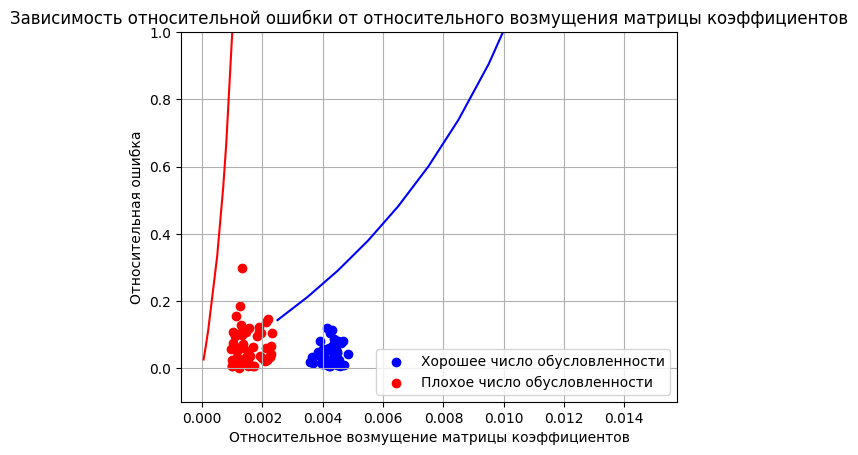

In [113]:
plt.scatter(many_relative_disturbance_good,many_relative_errors_good,color='blue',label='Хорошее число обусловленности')
plt.scatter(many_relative_disturbance_bad,many_relative_errors_bad,color='red',label='Плохое число обусловленности')
plt.legend()
plt.plot(x1,y_good,color='blue')
plt.plot(x2,y_bad,color='red')
plt.ylim([-0.1,1])
plt.grid(True)
plt.xlabel('Относительное возмущение матрицы коэффициентов')
plt.ylabel('Относительная ошибка')
plt.title('Зависимость относительной ошибки от относительного возмущения матрицы коэффициентов')